<a href="https://colab.research.google.com/github/prithvikolla/Compuational_Methods_INFO5731/blob/master/In_Class_Exersise/In_Class_exercises_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In class exercise 10

The purpose of the exercise is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K means, 
DBSCAN,
Hierarchical clustering. 

You can refer to of the codes from  the follwing link below. 
https://www.kaggle.com/karthik3890/text-clustering 
    

In [5]:
#Write your code here.
import pandas as pd
df = pd.read_csv('/content/Restaurant_Reviews.tsv',delimiter= '\t')
df.shape

(1000, 2)

In one paragraph, please compare K means, DBSCAN and Hierarchical clustering. 

In [6]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [7]:
#You can write you answer here.
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


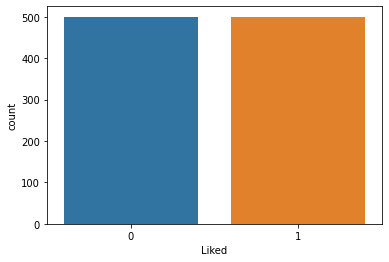

In [8]:
sns.countplot(df.Liked)

In [9]:
def partition(x):
    if x == 0:
        return 'negative'
    return 'positive'

#changing reviews with score less than 3 to be positive
actualScore = df['Liked']
positiveNegative = actualScore.map(partition) 
df['Liked'] = positiveNegative

In [10]:
df.head()

,Review,Liked
0,Wow... Loved this place.,positive
1,Crust is not good.,negative
2,Not tasty and the texture was just nasty.,negative
3,Stopped by during the late May bank holiday of...,positive
4,The selection on the menu was great and so wer...,positive


In [11]:
df['Liked'].value_counts()

negative    500
positive    500
Name: Liked, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


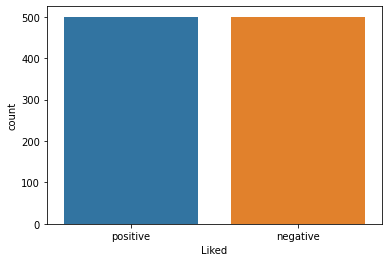

In [12]:
sns.countplot(df.Liked)

In [13]:
import re
i=0;
for sent in df['Review'].values:
    if (len(re.findall('<.*?>', sent))):
        print(i)
        print(sent)
        break;
    i += 1;

In [14]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
sno = nltk.stem.SnowballStemmer('english') #initialising the snowball stemmer which is developed in recent years
stop=set(stopwords.words('english'))



def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned
print(stop)
print('************************************')
print(sno.stem('tasty'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
{'ain', "didn't", 'these', 'isn', 'wouldn', 'other', 'being', 'and', 'his', 'few', 'between', 'was', 'm', 'during', 'under', 'own', 'couldn', "shouldn't", 'through', 'doesn', 'the', 'what', 'y', 't', 'll', 'into', 'out', "you'll", 'them', 'for', 'our', 'should', 'when', 'here', 'her', 'themselves', 'doing', 'were', 'no', "hadn't", 'weren', 'myself', 'then', "wasn't", 'against', 'than', 'had', 'they', 'who', 'any', 'an', 'where', 'do', 'me', 'herself', 'have', "you're", 'over', "haven't", 'will', 'ours', 'won', "isn't", 'o', 'those', 'hadn', 'she', 'be', 'just', 'mightn', 'after', 'how', 'at', 'did', 'both', "shan't", 'my', "it's", 'he', 'each', 'now', 'further', 'wasn', 'so', 'below', 'with', "should've", 'yourself', "couldn't", 'once', 'am', 'nor', 'why', 'not', 'mustn', 'from', 'on', 'same', 'because', 'him', 'can', 'it', 'up', 'is', 'only', 'didn', 's', 'ourselves',

In [15]:
df['Review'] = df['Review'].apply(str)

In [16]:
i=0
str1=' '
final_string=[]
all_positive_words=[] # store words from +ve reviews here
all_negative_words=[] # store words from -ve reviews here.
s=''
for sent in df['Review'].values:
    filtered_sentence=[]
    #print(sent);
    sent=cleanhtml(sent) # remove HTMl tags
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):    
                if(cleaned_words.lower() not in stop):
                    s=(sno.stem(cleaned_words.lower())).encode('utf8')
                    filtered_sentence.append(s)
                    if (df['Liked'].values)[i] == 'positive': 
                        all_positive_words.append(s) #list of all words used to describe positive reviews
                    if(df['Liked'].values)[i] == 'negative':
                        all_negative_words.append(s) #list of all words used to describe negative reviews reviews
                else:
                    continue
            else:
                continue 
    #print(filtered_sentence)
    str1 = b" ".join(filtered_sentence) #final string of cleaned words
    #print("***********************************************************************")

    final_string.append(str1)
    i+=1

In [17]:
df['CleanedText']=final_string 
df['CleanedText']=df['CleanedText'].str.decode("utf-8")

In [18]:
data_pos = df[df['Liked']== "positive"]
data_neg = df[df['Liked'] == "negative"]
final = pd.concat([data_pos, data_neg])
score = df['Liked']
final.head()

,Review,Liked,CleanedText
0,Wow... Loved this place.,positive,wow love place
3,Stopped by during the late May bank holiday of...,positive,stop late may bank holiday rick steve recommen...
4,The selection on the menu was great and so wer...,positive,select menu great price
8,The fries were great too.,positive,fri great
9,A great touch.,positive,great touch


In [19]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
bow = count_vect.fit_transform(df['CleanedText'].values)
bow.shape

(1000, 1544)

In [20]:
terms = count_vect.get_feature_names()

In [21]:
terms[1:10]


['absolutley',
 'accid',
 'accommod',
 'accomod',
 'accord',
 'account',
 'ach',
 'acknowledg',
 'across']

In [22]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 10,init='k-means++', n_jobs = -1,random_state=99)
model.fit(bow)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=99, tol=0.0001, verbose=0)

In [24]:
labels = model.labels_
cluster_center=model.cluster_centers_

In [25]:
cluster_center

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01010101, 0.001443  , 0.001443  , ..., 0.002886  , 0.00577201,
        0.00721501],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01315789, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [26]:
from sklearn import metrics
silhouette_score = metrics.silhouette_score(bow, labels, metric='euclidean')

In [27]:
silhouette_score

0.021462730254456545

In [28]:
df = final
df['Bow Clus Label'] = model.labels_ # the last column you can see the label numebers
df.head(2)

,Review,Liked,CleanedText,Bow Clus Label
0,Wow... Loved this place.,positive,wow love place,1
3,Stopped by during the late May bank holiday of...,positive,stop late may bank holiday rick steve recommen...,0


In [29]:
df.groupby(['Bow Clus Label'])['Review'].count()

Bow Clus Label
0     77
1    693
2      3
3      7
4     53
5     11
6      2
7     77
8      1
9     76
Name: Review, dtype: int64

In [30]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = count_vect.get_feature_names()
for i in range(10):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
        print()

Top terms per cluster:
Cluster 0: good
 food
 realli
 place
 select
 pizza
 price
 pretti
 tasti
 way
Cluster 1: place
 back
 time
 like
 love
 would
 disappoint
 ever
 realli
 dont
Cluster 2: like
 made
 chip
 also
 feel
 bought
 bar
 serv
 origin
 bit
Cluster 3: reason
 price
 servic
 back
 public
 mall
 aria
 shop
 insid
 mayo
Cluster 4: great
 food
 place
 alway
 eat
 menu
 drink
 area
 good
 experi
Cluster 5: staff
 friend
 nice
 super
 even
 server
 clean
 alway
 serv
 first
Cluster 6: burger
 flavor
 absolut
 disappoint
 total
 bland
 charcoal
 kind
 overcook
 standard
Cluster 7: servic
 food
 great
 slow
 like
 friend
 good
 custom
 came
 excel
Cluster 8: steak
 best
 place
 son
 guy
 eaten
 ever
 hes
 love
 worst
Cluster 9: food
 place
 delici
 wait
 minut
 bad
 time
 like
 even
 one


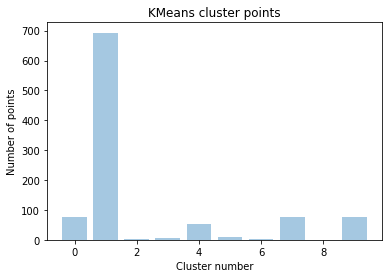

In [31]:
import matplotlib.pyplot as plt
plt.bar([x for x in range(10)], df.groupby(['Bow Clus Label'])['Review'].count(), alpha = 0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

In [32]:
for i in range(10):
    print("A review of assigned to cluster ", i)
    print("-" * 70)
    print(df.iloc[df.groupby(['Bow Clus Label']).groups[i][0]]['Review'])
    print('\n')
    print("_" * 70)

A review of assigned to cluster  0
----------------------------------------------------------------------
The fries were great too.


______________________________________________________________________
A review of assigned to cluster  1
----------------------------------------------------------------------
Wow... Loved this place.


______________________________________________________________________
A review of assigned to cluster  2
----------------------------------------------------------------------
The grilled chicken was so tender and yellow from the saffron seasoning.


______________________________________________________________________
A review of assigned to cluster  3
----------------------------------------------------------------------
Those burgers were amazing.


______________________________________________________________________
A review of assigned to cluster  4
----------------------------------------------------------------------
Service is also cute.


__

In [35]:
print(df.iloc[df.groupby(['Bow Clus Label']).groups[3][3]]['Review'])
print("_" * 70)
print(df.iloc[df.groupby(['Bow Clus Label']).groups[3][4]]['Review'])
print("_" * 70)
print(df.iloc[df.groupby(['Bow Clus Label']).groups[3][5]]['Review'])

What did bother me, was the slow service.
______________________________________________________________________
We ordered the duck rare and it was pink and tender on the inside with a nice char on the outside.
______________________________________________________________________
I always order from the vegetarian menu during dinner, which has a wide array of options to choose from.


In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()
tfidf = tfidf_vect.fit_transform(df['CleanedText'].values)
tfidf.shape

(1000, 1544)

In [37]:
from sklearn.cluster import KMeans
model_tf = KMeans(n_clusters = 10, n_jobs = -1,random_state=99)
model_tf.fit(tfidf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=99, tol=0.0001, verbose=0)

In [38]:
labels_tf = model_tf.labels_
cluster_center_tf=model_tf.cluster_centers_

In [39]:
cluster_center_tf

array([[0.01546839, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00567397, 0.0015134 , 0.        , ..., 0.00076332, 0.00328338,
        0.00291574],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00628348, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [40]:
terms1 = tfidf_vect.get_feature_names()

In [41]:
terms1[1:10]

['absolutley',
 'accid',
 'accommod',
 'accomod',
 'accord',
 'account',
 'ach',
 'acknowledg',
 'across']

In [42]:
from sklearn import metrics
silhouette_score_tf = metrics.silhouette_score(tfidf, labels_tf, metric='euclidean')

In [43]:
silhouette_score_tf

0.018837061234436413

In [44]:
df1 = df
df1['Tfidf Clus Label'] = model_tf.labels_
df1.head(5)

,Review,Liked,CleanedText,Bow Clus Label,Tfidf Clus Label
0,Wow... Loved this place.,positive,wow love place,1,8
3,Stopped by during the late May bank holiday of...,positive,stop late may bank holiday rick steve recommen...,0,2
4,The selection on the menu was great and so wer...,positive,select menu great price,1,1
8,The fries were great too.,positive,fri great,1,1
9,A great touch.,positive,great touch,4,1


In [45]:
df1.groupby(['Tfidf Clus Label'])['Review'].count()

Tfidf Clus Label
0     44
1     47
2    531
3     63
4     37
5     64
6     70
7     38
8     87
9     19
Name: Review, dtype: int64

In [46]:
print("Top terms per cluster:")
order_centroids = model_tf.cluster_centers_.argsort()[:, ::-1]
for i in range(10):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms1[ind], end='')
        print()

Top terms per cluster:
Cluster 0: back
 come
 never
 definit
 time
 think
 would
 soon
 everi
 ill
Cluster 1: great
 food
 place
 eat
 experi
 alway
 servic
 dinner
 menu
 atmospher
Cluster 2: dont
 like
 time
 disappoint
 wait
 love
 restaur
 eat
 get
 ever
Cluster 3: servic
 food
 slow
 terribl
 fantast
 great
 like
 good
 custom
 poor
Cluster 4: also
 price
 reason
 made
 hous
 servic
 food
 fri
 town
 portion
Cluster 5: good
 food
 realli
 select
 pizza
 pretti
 though
 time
 tasti
 price
Cluster 6: food
 delici
 averag
 best
 terribl
 arriv
 bad
 amaz
 even
 dish
Cluster 7: friend
 staff
 servic
 waitress
 attent
 super
 even
 server
 nice
 help
Cluster 8: place
 would
 love
 like
 sushi
 recommend
 amaz
 overpr
 night
 want
Cluster 9: wont
 back
 disappoint
 go
 probabl
 anytim
 soon
 return
 assur
 promis


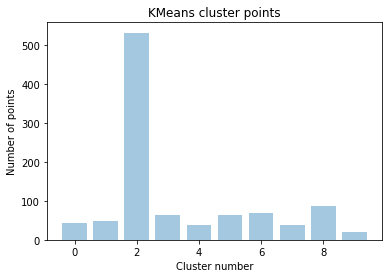

In [47]:
plt.bar([x for x in range(10)], df1.groupby(['Tfidf Clus Label'])['Review'].count(), alpha = 0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

In [51]:
i=0
list_of_sent=[]
for sent in df['CleanedText'].values:
    list_of_sent.append(sent.split())

In [52]:
print(df['CleanedText'].values[0])
print("*****************************************************************")
print(list_of_sent[0])

wow love place
*****************************************************************
['wow', 'love', 'place']


In [53]:
import re
def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned

In [54]:
i=0
list_of_sent_train=[]
for sent in df['CleanedText'].values:
    filtered_sentence=[]
    sent=cleanhtml(sent)
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if(cleaned_words.isalpha()):    
                filtered_sentence.append(cleaned_words.lower())
            else:
                continue 
    list_of_sent_train.append(filtered_sentence)

In [55]:
import gensim
# Training the wor2vec model using train dataset
w2v_model=gensim.models.Word2Vec(list_of_sent_train,size=100, workers=4)

In [56]:
import numpy as np
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this train
for sent in list_of_sent_train: # for each review/sentence
    sent_vec = np.zeros(100) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
sent_vectors = np.array(sent_vectors)
sent_vectors = np.nan_to_num(sent_vectors)
sent_vectors.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


(1000, 100)

In [57]:
num_clus = [x for x in range(3,11)]
num_clus

[3, 4, 5, 6, 7, 8, 9, 10]

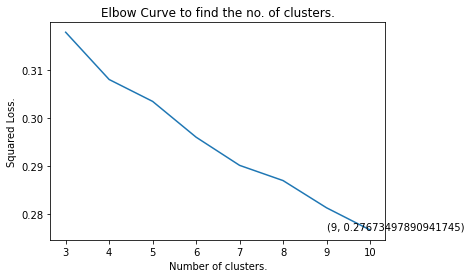

The optimal number of clusters obtained is -  9
The loss for optimal cluster is -  0.27673497890941745


In [58]:
squared_errors = []
for cluster in num_clus:
    kmeans = KMeans(n_clusters = cluster).fit(sent_vectors) 
    squared_errors.append(kmeans.inertia_) 
    
optimal_clusters = np.argmin(squared_errors) + 2 
plt.plot(num_clus, squared_errors)
plt.title("Elbow Curve to find the no. of clusters.")
plt.xlabel("Number of clusters.")
plt.ylabel("Squared Loss.")
xy = (optimal_clusters, min(squared_errors))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.show()

print ("The optimal number of clusters obtained is - ", optimal_clusters)
print ("The loss for optimal cluster is - ", min(squared_errors))

In [59]:
from sklearn.cluster import KMeans
model2 = KMeans(n_clusters = optimal_clusters)
model2.fit(sent_vectors)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [60]:
word_cluster_pred=model2.predict(sent_vectors)
word_cluster_pred_2=model2.labels_
word_cluster_center=model2.cluster_centers_

In [61]:
dfa = df1
dfa['AVG-W2V Clus Label'] = model2.labels_
dfa.head(2)

,Review,Liked,CleanedText,Bow Clus Label,Tfidf Clus Label,AVG-W2V Clus Label
0,Wow... Loved this place.,positive,wow love place,1,8,2
3,Stopped by during the late May bank holiday of...,positive,stop late may bank holiday rick steve recommen...,0,2,8


In [62]:
dfa.groupby(['AVG-W2V Clus Label'])['Review'].count()

AVG-W2V Clus Label
0     35
1    205
2     77
3     79
4     24
5     70
6     57
7    310
8    143
Name: Review, dtype: int64

In [63]:
for i in range(optimal_clusters):
    print("A review of assigned to cluster ", i)
    print("-" * 70)
    print(dfa.iloc[dfa.groupby(['AVG-W2V Clus Label']).groups[i][0]]['Review'])
    print('\n')
    print(dfa.iloc[dfa.groupby(['AVG-W2V Clus Label']).groups[i][1]]['Review'])
    print('\n')
    print("_" * 70)

A review of assigned to cluster  0
----------------------------------------------------------------------
I could care less... The interior is just beautiful.


The only thing I did like was the prime rib and dessert section.


______________________________________________________________________
A review of assigned to cluster  1
----------------------------------------------------------------------
The burger is good beef, cooked just right.


Update.....went back for a second time and it was still just as amazing


______________________________________________________________________
A review of assigned to cluster  2
----------------------------------------------------------------------
Wow... Loved this place.


This place receives stars for their APPETIZERS!!!


______________________________________________________________________
A review of assigned to cluster  3
----------------------------------------------------------------------
A great touch.


The food, amazing.


____

**DBSCAN**

In [64]:
from sklearn.cluster import DBSCAN

In [65]:
minPts = 2 * 100

def lower_bound(nums, target): 
    l, r = 0, len(nums) - 1
    while l <= r: 
        mid = int(l + (r - l) / 2)
        if nums[mid] >= target:
            r = mid - 1
        else:
            l = mid + 1
    return l

def compute200thnearestneighbour(x, data): 
    dists = []
    for val in data:
        dist = np.sum((x - val) **2 ) 
        if(len(dists) == 200 and dists[199] > dist): 
            l = int(lower_bound(dists, dist)) 
            if l < 200 and l >= 0 and dists[l] > dist:
                dists[l] = dist
        else:
            dists.append(dist)
            dists.sort()
    
    return dists[199]

In [66]:
twohundrethneigh = []
for val in sent_vectors[:1500]:
    twohundrethneigh.append( compute200thnearestneighbour(val, sent_vectors[:1500]) )
twohundrethneigh.sort()

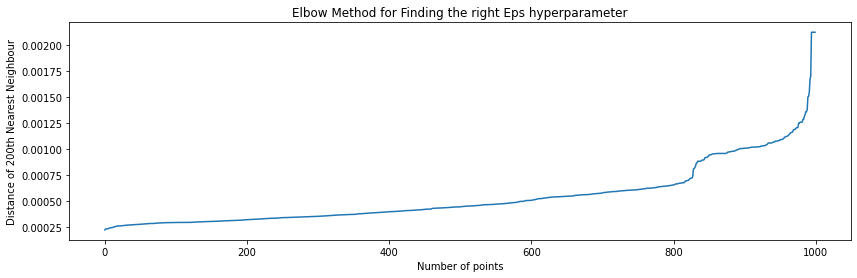

In [67]:
plt.figure(figsize=(14,4))
plt.title("Elbow Method for Finding the right Eps hyperparameter")
plt.plot([x for x in range(len(twohundrethneigh))], twohundrethneigh)
plt.xlabel("Number of points")
plt.ylabel("Distance of 200th Nearest Neighbour")
plt.show()

In [68]:
model = DBSCAN(eps = 5, min_samples = minPts, n_jobs=-1)
model.fit(sent_vectors)

DBSCAN(algorithm='auto', eps=5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=200, n_jobs=-1, p=None)

In [69]:
dfdb = dfa
dfdb['AVG-W2V Clus Label'] = model.labels_
dfdb.head(2)

,Review,Liked,CleanedText,Bow Clus Label,Tfidf Clus Label,AVG-W2V Clus Label
0,Wow... Loved this place.,positive,wow love place,1,8,0
3,Stopped by during the late May bank holiday of...,positive,stop late may bank holiday rick steve recommen...,0,2,0


**Hierarchial Clustering**

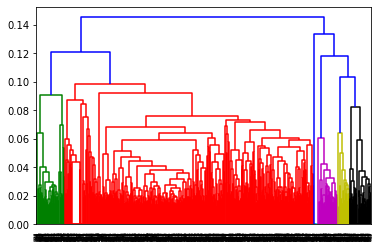

In [70]:
import scipy
from scipy.cluster import hierarchy
dendro=hierarchy.dendrogram(hierarchy.linkage(sent_vectors,method='ward'))
plt.axhline(y=35)

In [71]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  #took n=5 from dendrogram curve 
Agg=cluster.fit_predict(sent_vectors)

In [72]:
aggdfa = dfdb
aggdfa['AVG-W2V Clus Label'] = cluster.labels_
aggdfa.head(2)

,Review,Liked,CleanedText,Bow Clus Label,Tfidf Clus Label,AVG-W2V Clus Label
0,Wow... Loved this place.,positive,wow love place,1,8,3
3,Stopped by during the late May bank holiday of...,positive,stop late may bank holiday rick steve recommen...,0,2,3


In [73]:
aggdfa.groupby(['AVG-W2V Clus Label'])['Review'].count()

AVG-W2V Clus Label
0    100
1    743
2     12
3     85
4     60
Name: Review, dtype: int64

In [74]:
for i in range(5):
    print("2 reviews of assigned to cluster ", i)
    print("-" * 70)
    print(aggdfa.iloc[aggdfa.groupby(['AVG-W2V Clus Label']).groups[i][0]]['Review'])
    print('\n')
    print(aggdfa.iloc[aggdfa.groupby(['AVG-W2V Clus Label']).groups[i][1]]['Review'])
    print('\n')
    print("_" * 70)

2 reviews of assigned to cluster  0
----------------------------------------------------------------------
I could care less... The interior is just beautiful.


The only thing I did like was the prime rib and dessert section.


______________________________________________________________________
2 reviews of assigned to cluster  1
----------------------------------------------------------------------
A great touch.


The food, amazing.


______________________________________________________________________
2 reviews of assigned to cluster  2
----------------------------------------------------------------------
Food arrived quickly!


The best place to go for a tasty bowl of Pho!


______________________________________________________________________
2 reviews of assigned to cluster  3
----------------------------------------------------------------------
Wow... Loved this place.


The fries were great too.


______________________________________________________________________
2

I think K means is best among all models. with the help of methods like elbow we get to find the optimal values.